In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_csv_columns_with_max(filepath):
    """Opens a CSV, plots all columns vs. index, displays max values 
       (ignoring NaNs) in legend, and returns a list of 
       (column_name, max_value) tuples.
    """
    try:
        df = pd.read_csv(filepath)

        num_columns = len(df.columns)
        fig, axes = plt.subplots(nrows=num_columns, figsize=(8, num_columns * 2), sharex=True)

        if num_columns == 1:
            axes = [axes]

        max_values = []

        for i, column_name in enumerate(df.columns):
            data = df[column_name].values

            max_value = np.nanmax(data)  # Calculate max, ignoring NaNs
            max_index = np.nanargmax(data) # Calculate max index, ignoring NaNs
            max_values.append((column_name, max_value))

            axes[i].plot(df.index, data,  # Plot all the data (including NaNs)
                         label=f"{column_name} (Max: {max_value:.2f} at index {max_index})")
            axes[i].set_ylabel(column_name)
            axes[i].set_xlabel("Index")
            axes[i].legend()

        plt.suptitle("Columns vs. Index")
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

        return max_values

    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: CSV file is empty: {filepath}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage (same as before)

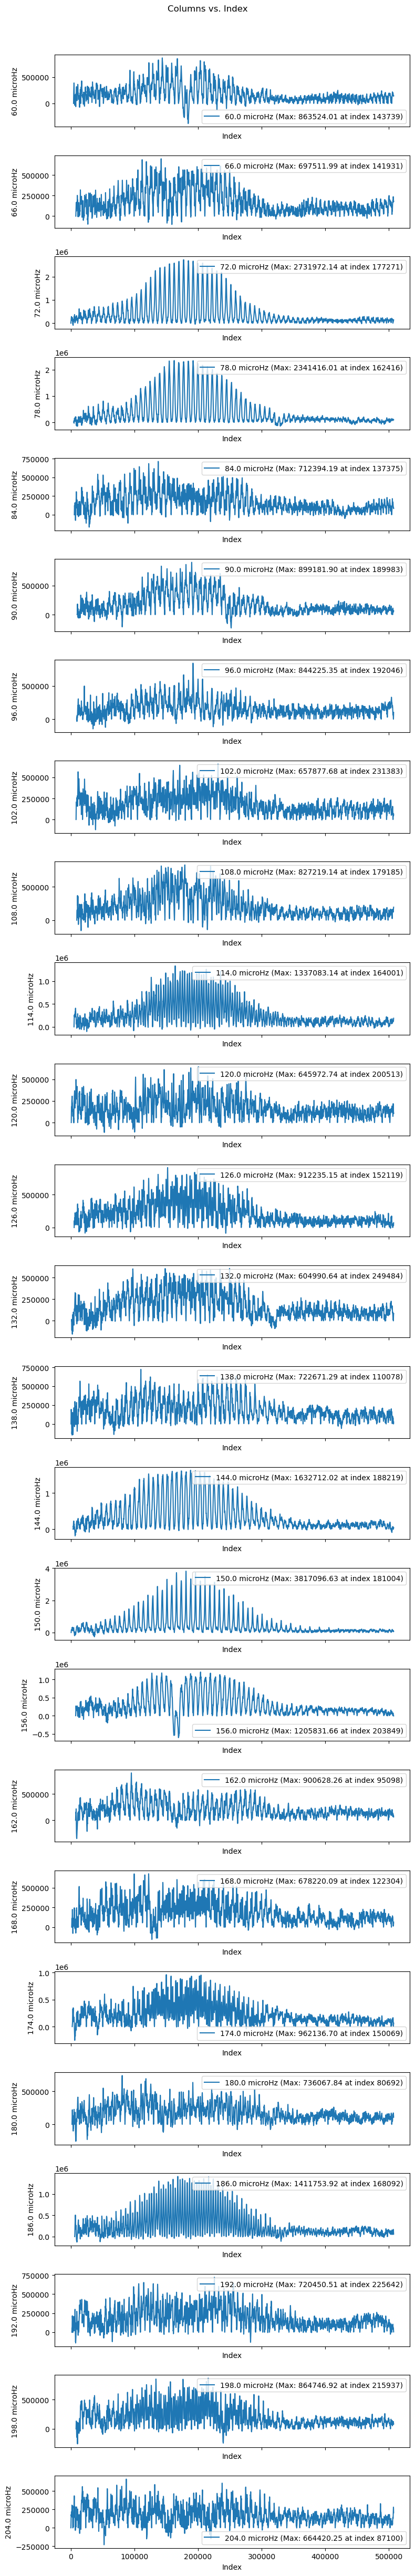

[('60.0 microHz', 863524.0078867506), ('66.0 microHz', 697511.9935848722), ('72.0 microHz', 2731972.140295239), ('78.0 microHz', 2341416.014148633), ('84.0 microHz', 712394.1903058374), ('90.0 microHz', 899181.9030051241), ('96.0 microHz', 844225.3526387857), ('102.0 microHz', 657877.678764673), ('108.0 microHz', 827219.1365799559), ('114.0 microHz', 1337083.140610431), ('120.0 microHz', 645972.7410454378), ('126.0 microHz', 912235.1460317244), ('132.0 microHz', 604990.6351478146), ('138.0 microHz', 722671.2944262102), ('144.0 microHz', 1632712.0229701623), ('150.0 microHz', 3817096.6342130015), ('156.0 microHz', 1205831.6625102507), ('162.0 microHz', 900628.2599218832), ('168.0 microHz', 678220.0917014908), ('174.0 microHz', 962136.7017349292), ('180.0 microHz', 736067.8376967739), ('186.0 microHz', 1411753.9218258904), ('192.0 microHz', 720450.5051079663), ('198.0 microHz', 864746.9191423394), ('204.0 microHz', 664420.2465691455)]


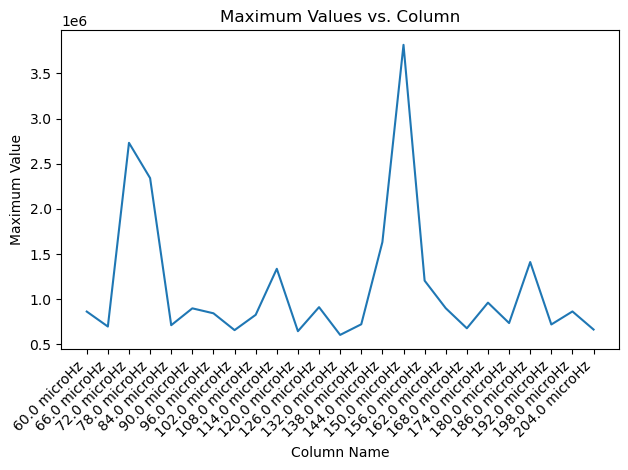

In [9]:
# Example usage:
filepath = "combinedFilteredData.csv"  # Replace with your CSV file path
max_values_list = plot_csv_columns_with_max(filepath)

if max_values_list:  # Check if the list is not None (i.e., no error occurred)
    print(max_values_list)

    # Plot max values (example) - assuming you want to plot max values vs. column index:
    column_names, max_values = zip(*max_values_list)
    plt.plot(column_names, max_values)
    plt.xlabel("Column Name")
    plt.ylabel("Maximum Value")
    plt.title("Maximum Values vs. Column")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if needed
    plt.tight_layout()
    plt.show()